COVID-19 GLOBAL DATA ANALYSIS
Part 1 – Pandas

In [43]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\kavin\Downloads\archive\worldometer_data.csv")
df1=pd.read_csv('full_grouped.csv')
df2=pd.read_csv('day_wise.csv')
df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [15]:
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)

(209, 16)
['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']
Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
0


In [6]:
print(df.describe())

         Population    TotalCases     NewCases    TotalDeaths   NewDeaths  \
count  2.080000e+02  2.090000e+02     4.000000     188.000000    3.000000   
mean   3.041549e+07  9.171850e+04  1980.500000    3792.590426  300.000000   
std    1.047661e+08  4.325867e+05  3129.611424   15487.184877  451.199512   
min    8.010000e+02  1.000000e+01    20.000000       1.000000    1.000000   
25%    9.663140e+05  7.120000e+02    27.500000      22.000000   40.500000   
50%    7.041972e+06  4.491000e+03   656.000000     113.000000   80.000000   
75%    2.575614e+07  3.689600e+04  2609.000000     786.000000  449.500000   
max    1.381345e+09  5.032179e+06  6590.000000  162804.000000  819.000000   

       TotalRecovered  NewRecovered   ActiveCases  Serious,Critical  \
count    2.050000e+02      3.000000  2.050000e+02        122.000000   
mean     5.887898e+04   1706.000000  2.766433e+04        534.393443   
std      2.566984e+05   2154.779803  1.746327e+05       2047.518613   
min      7.000000e+00 

In [29]:
print(df['Country/Region'].nunique())

209


In [41]:
print(df1['Date'].max())

2020-07-27


Part 2 – EDA

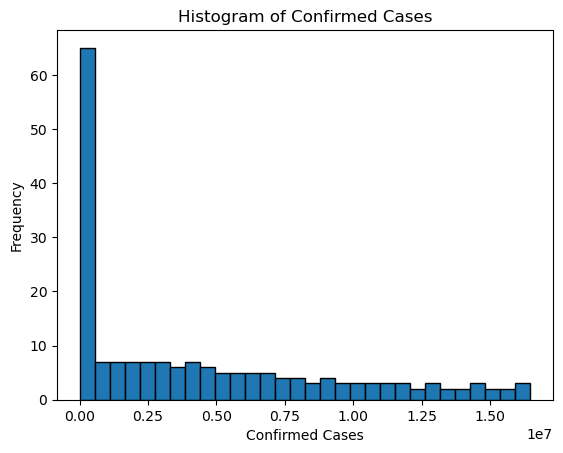

In [44]:
import matplotlib.pyplot as plt

plt.hist(df2['Confirmed'], bins=30, edgecolor='black')
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.title("Histogram of Confirmed Cases")
plt.show()

In [48]:
y = df1['Date'].max()
top_10_countries = df1[df1['Date'] == y].nlargest(10, 'Confirmed')
print(top_10_countries)

             Date  Country/Region  Confirmed  Deaths  Recovered   Active  \
35142  2020-07-27              US    4290259  148011    1325804  2816444   
34992  2020-07-27          Brazil    2442375   87618    1846641   508116   
35048  2020-07-27           India    1480073   33408     951166   495499   
35107  2020-07-27          Russia     816680   13334     602249   201097   
35123  2020-07-27    South Africa     452529    7067     274925   170537   
35080  2020-07-27          Mexico     395489   44022     303810    47657   
35101  2020-07-27            Peru     389717   18418     272547    98752   
35004  2020-07-27           Chile     347923    9187     319954    18782   
35146  2020-07-27  United Kingdom     301708   45844       1437   254427   
35050  2020-07-27            Iran     293606   15912     255144    22550   

       New cases  New deaths  New recovered             WHO Region  
35142      56336        1076          27941               Americas  
34992      23284         

In [47]:
y = df1['Date'].max()
top_10_deaths = df1[df1['Date'] == y].nlargest(10, 'Deaths')
print(top_10_deaths)

             Date  Country/Region  Confirmed  Deaths  Recovered   Active  \
35142  2020-07-27              US    4290259  148011    1325804  2816444   
34992  2020-07-27          Brazil    2442375   87618    1846641   508116   
35146  2020-07-27  United Kingdom     301708   45844       1437   254427   
35080  2020-07-27          Mexico     395489   44022     303810    47657   
35054  2020-07-27           Italy     246286   35112     198593    12581   
35048  2020-07-27           India    1480073   33408     951166   495499   
35030  2020-07-27          France     220352   30212      81212   108928   
35126  2020-07-27           Spain     272421   28432     150376    93613   
35101  2020-07-27            Peru     389717   18418     272547    98752   
35050  2020-07-27            Iran     293606   15912     255144    22550   

       New cases  New deaths  New recovered             WHO Region  
35142      56336        1076          27941               Americas  
34992      23284         

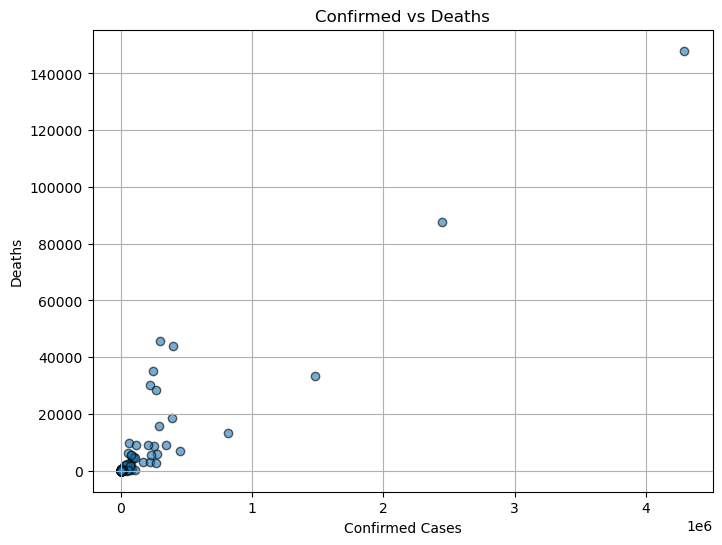

In [53]:
l = df1[df1['Date'] == y]
plt.figure(figsize=(8,6))
plt.scatter(l['Confirmed'], l['Deaths'], alpha=0.6, edgecolor='k')

plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed vs Deaths")
plt.grid(True)
plt.show()

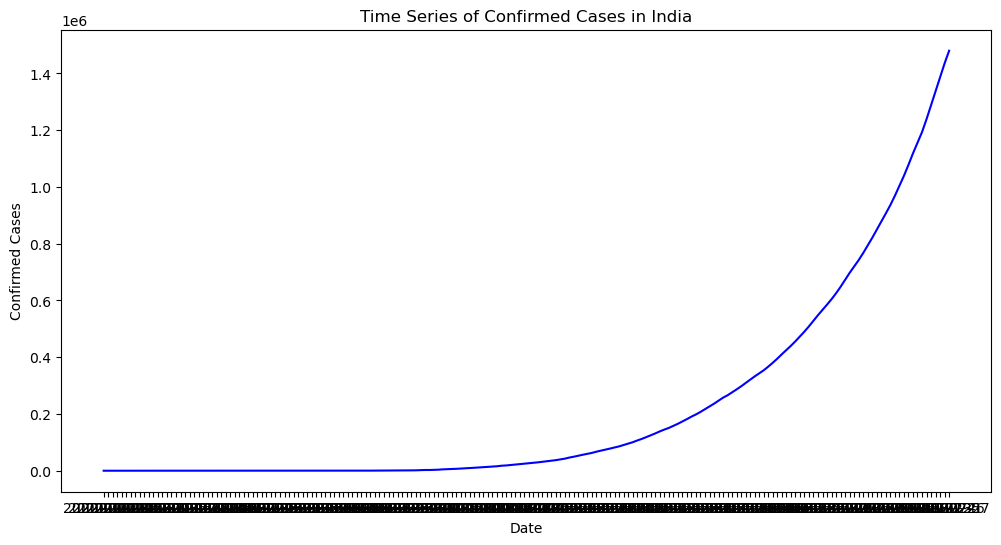

In [54]:
india_data = df1[df1['Country/Region'] == 'India']
plt.figure(figsize=(12,6))
plt.plot(india_data['Date'], india_data['Confirmed'], color='blue')
plt.title('Time Series of Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

In [55]:
print(df['Continent'].unique())

['North America' 'South America' 'Asia' 'Europe' 'Africa'
 'Australia/Oceania' nan]


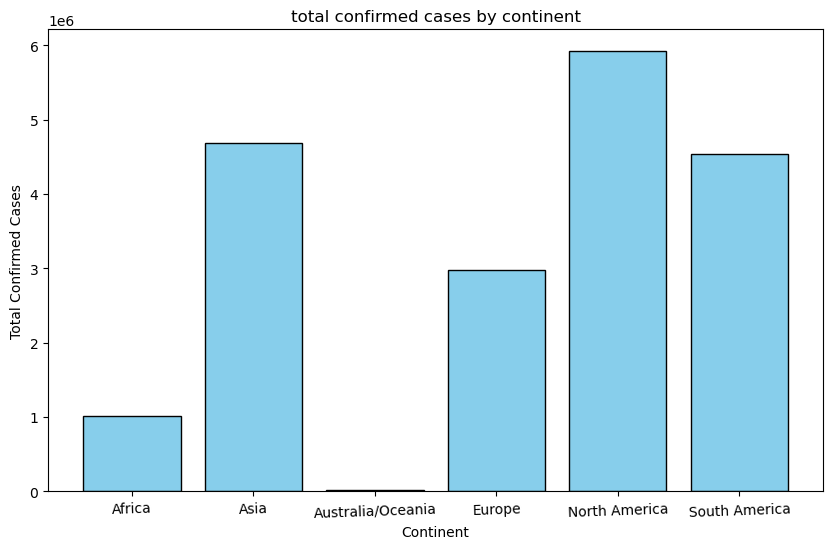

In [60]:
c = df.groupby('Continent', as_index=False)['TotalCases'].sum()

plt.figure(figsize=(10,6))
plt.bar(c['Continent'], c['TotalCases'],color='skyblue', edgecolor='black')
plt.title("total confirmed cases by continent")
plt.xlabel("Continent")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=2)

plt.show()


Part 3 – Statistics

In [61]:

print(df['TotalCases'].mean())
print(df['TotalCases'].median())
print(df['TotalCases'].mode()[0])

91718.4976076555
4491.0
13


In [62]:
print(df['TotalDeaths'].var())
print(df['TotalDeaths'].std())

239852895.4195872
15487.184877168194


In [63]:
df['TotalCases'].corr(df['TotalDeaths'])


np.float64(0.9386219031238764)

In [66]:
(df['TotalCases'] > 100000).mean().round(2)

np.float64(0.12)

In [69]:
death_rate = df['TotalDeaths'] / df['TotalCases']
b=(death_rate > 0.05).mean().round(2)
print(b)

0.16



Part 4 – Linear Algebra & NumPy